In [31]:
# Importamos librerias necesarias

import pandas as pd
import numpy as np
import gzip
import ast
import seaborn as sns
import nltk
import vaderSentiment

### ETL STEAM_GAMES.JSON.GZ

In [32]:
# # PARA RECASRGAR
# steam = pd.read_csv('steam.csv')
# reviews = pd.read_csv('reviews.csv')
# items = pd.read_csv('items.csv')

In [33]:
#descomprimimos los archivos del dataset descomprimimos con gzip

steam= gzip.open('dataset/steam_games.json.gz')

In [34]:
# procedemos a leer output_steam
steam = pd.read_json(steam, lines= True)

In [35]:
# Chequeamos la informacion del dataframe
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [36]:
#analizamos la cantidad de nulos 
steam.isnull().sum()

publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64

Mucha cantidad de nulos, por lo que procedo a ver la forma mediante un grafico

<Axes: >

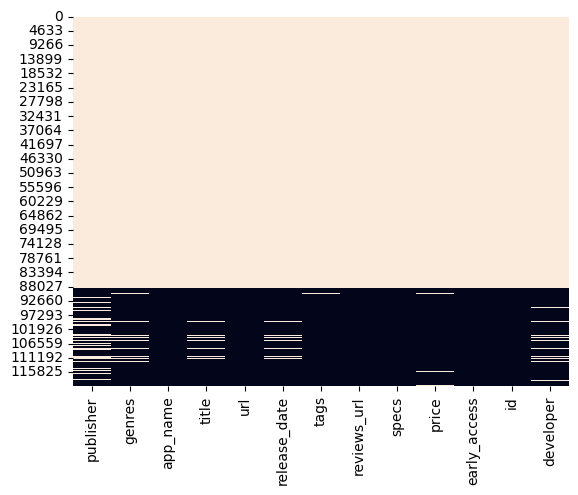

In [37]:
sns.heatmap(steam.isnull(), cbar=False)

Por la cantidad de nulos y forma que surge del dataframe podemos apreciar que la gran mayoria de las filas podemos eliminar, al parecer este dataframe se concateno con uno vacio.

In [38]:
# procedo a eliminar todos los nulos por fuera del subset id

steam = steam.dropna().reset_index(drop=True)
steam.shape

(22530, 13)

<Axes: >

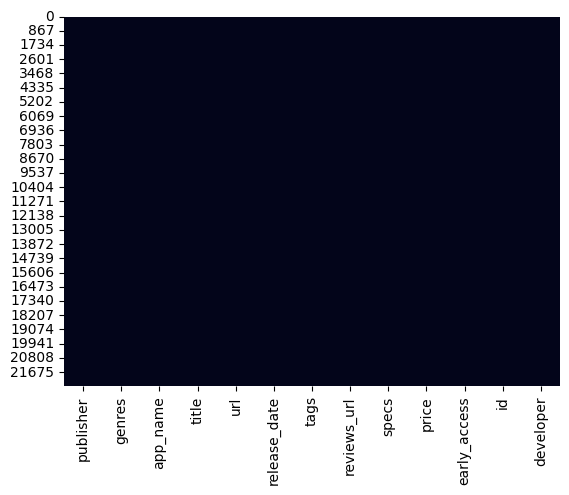

In [39]:
# visualizamos brevemente como quedo el dataset despues de estas primeras modificaciones
sns.heatmap(steam.isnull(), cbar=False)

In [40]:
# procedemos a ver la informacion
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22530 non-null  object 
 1   genres        22530 non-null  object 
 2   app_name      22530 non-null  object 
 3   title         22530 non-null  object 
 4   url           22530 non-null  object 
 5   release_date  22530 non-null  object 
 6   tags          22530 non-null  object 
 7   reviews_url   22530 non-null  object 
 8   specs         22530 non-null  object 
 9   price         22530 non-null  object 
 10  early_access  22530 non-null  float64
 11  id            22530 non-null  float64
 12  developer     22530 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.2+ MB


In [41]:
#analizamos las primeras columnas
steam.head(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL


In [42]:
steam.tail(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
22528,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
22529,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


Procedemos a eliminar las columnas que no necesitaremos para el armado de consultas de nuestra API

In [43]:
# revisamos las columnas
steam.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [44]:
steam = steam.drop(columns=['publisher','url', 'reviews_url', 'tags', 'specs', 'price', 'developer'])

In [45]:
steam.isnull().sum()

genres          0
app_name        0
title           0
release_date    0
early_access    0
id              0
dtype: int64

Procedemos a identificar valores duplicados en la columna 'id'

In [46]:
steam['id'].duplicated().sum()

1

In [47]:
# Eliminamos los valores duplicados en la columna id
steam = steam.drop_duplicates(subset='id')

In [48]:
steam.shape

(22529, 6)

In [49]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22529 entries, 0 to 22529
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        22529 non-null  object 
 1   app_name      22529 non-null  object 
 2   title         22529 non-null  object 
 3   release_date  22529 non-null  object 
 4   early_access  22529 non-null  float64
 5   id            22529 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.2+ MB


In [50]:
steam['id'] = steam.id.astype(int)

A los fines de poder realizar las funciones de la API crearemos una columna, con el año de lanzamiento del juego

In [51]:
# Se extrae el año en una nueva columna llamada "release_year" a traves del uso de expresiones regulares:
steam['release_year'] = steam['release_date'].str.extract(r'(\d{4})')

# Se elimina la columna original
steam = steam.drop(columns="release_date")
steam.head()


,genres,app_name,title,early_access,id,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,0.0,643980,2018
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,0.0,670290,2017
3,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,0.0,767400,2017
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,0.0,772540,2018


Analizamos la columna generos

In [62]:
# vamos a obtener los generos por cada linea mediante explode
steam['genres'] = steam['genres'].apply(ast.literal_eval)
steam = steam.explode('genres')

In [63]:
steam.head(2)

,Unnamed: 0,genres,app_name,title,early_access,id,release_year
0,0,Action,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,0,Casual,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0


In [64]:
# Se corrigen los géneros que tienen error:
steam['genres'].replace("Animation &amp; Modeling","Animation and Modeling", inplace= True)
steam['genres'].replace("Design &amp; Illustration","Design and llustration", inplace=True)


In [65]:
# agrupamos por id:
steam.head()

,Unnamed: 0,genres,app_name,title,early_access,id,release_year
0,0,Action,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,0,Casual,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,0,Indie,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,0,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,0,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0


In [66]:
steam = steam.drop(columns='Unnamed: 0', axis=1)
steam.head()

,genres,app_name,title,early_access,id,release_year
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,Casual,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,Indie,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0
0,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018.0


In [67]:
steam.isnull().sum()

genres          0
app_name        0
title           0
early_access    0
id              0
release_year    5
dtype: int64

In [68]:
steam.dropna(inplace= True)

In [69]:
steam.isnull().sum()

genres          0
app_name        0
title           0
early_access    0
id              0
release_year    0
dtype: int64

In [70]:
steam['release_year'] = steam['release_year'].astype(int)

In [71]:
# guardamos en un csv el progreso realizado
steam.to_csv('steam.csv')

### REVIEWS

Analizamos el siguiente dataset reviews

In [72]:

reviews = [] # Creo una lista que recibira cada linea del json

gzip_file = 'dataset/user_reviews.json.gz' # cargo en una variable el archivo gzip

# Abro el archivo gzip en modo lectura
with gzip.open(gzip_file, 'rt', encoding='utf-8') as file:
    # Leo el contenido del archivo
    file_contents = file.read()

# Dividir la cadena en objetos JSON individuales (si están separados por líneas en el archivo)
json_objects = [ast.literal_eval(line) for line in file_contents.splitlines()]

# Imprimir los objetos JSON
for json_data in json_objects:
    reviews.append(json_data)


In [73]:
# Convierto la lista en un Dataframe
reviews = pd.DataFrame(reviews)

In [74]:
# miramos las primeras filas, en la columna reviews, se puede ver que tiene anidado un json
reviews.head(1)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."


In [75]:
# chequeamos la informacion del dataframe reviews
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [76]:
# procedemos a desanidar la columna 'reviews'

# Usamos explode para desplegar los elementos de la lista en filas separadas
user_reviews = reviews.explode('reviews')
# Sacamos el indice
user_reviews.reset_index(drop=True,inplace=True)
# Desarrollamos en filas separadas cada review anidado
user_reviews =pd.concat([user_reviews,pd.json_normalize(user_reviews['reviews'])],axis=1)
# eliminamos la columna a desanidar
user_reviews.drop('reviews', axis=1, inplace=True)

user_reviews.head(3)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...


In [77]:
#chequeamos la forma que nos quedo, son 59333 filas y 9 columnas
user_reviews.shape

(59333, 9)

In [78]:
user_reviews.info() #vemos la informacion de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59333 non-null  object
 1   user_url     59333 non-null  object
 2   funny        59305 non-null  object
 3   posted       59305 non-null  object
 4   last_edited  59305 non-null  object
 5   item_id      59305 non-null  object
 6   helpful      59305 non-null  object
 7   recommend    59305 non-null  object
 8   review       59305 non-null  object
dtypes: object(9)
memory usage: 4.1+ MB


In [79]:
user_reviews.isnull().sum() # cantidad de nulos

user_id         0
user_url        0
funny          28
posted         28
last_edited    28
item_id        28
helpful        28
recommend      28
review         28
dtype: int64

In [80]:
# eliminamos los nulos
user_reviews = user_reviews.dropna()

<Axes: >

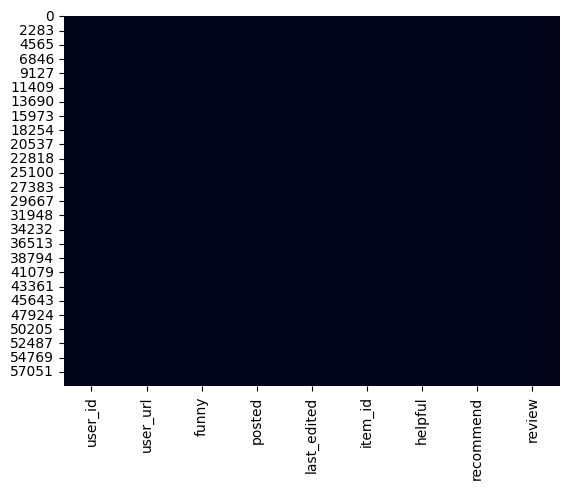

In [81]:
# visualizamos
sns.heatmap(user_reviews.isnull(), cbar=False) 

In [82]:
user_reviews = user_reviews.drop(columns=["user_url", "funny", "last_edited", "helpful"])
user_reviews.head()

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...


In [83]:
# controlamos si tiene duplicados
user_reviews.duplicated().sum()

874

In [84]:
user_reviews = user_reviews.drop_duplicates()
user_reviews.shape

(58431, 5)

### Procedemos a desrrollar la columna "sentiment_analysis"

In [85]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PABLO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = user_reviews.copy()  

# Inicializa el analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# Definimos una función para asignar valores según la escala especificada
def assign_sentiment(row):
    sentiment_scores = sia.polarity_scores(row['review'])
    compound_score = sentiment_scores['compound']
    
    if compound_score > 0:  # Positivo
        return 2
    elif compound_score < -0:  # Malo
        return 0
    else:  # Neutral
        return 1

# Aplicamos la función para crear la nueva columna 'sentiment_analysis'
# data['sentiment_analysis'] = data.apply(assign_sentiment, axis=1)
user_reviews['sentiment_analysis'] = user_reviews.apply(assign_sentiment, axis=1)


In [87]:
# revisamos como quedo
user_reviews.head(2)

,user_id,posted,item_id,recommend,review,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.,2


In [88]:
# a los efectos del modelo eliminamos la columna review
user_reviews.drop('review',axis=1,inplace=True)

In [89]:
# una rapida vista de como nos quedo el dataframe
user_reviews.head(1)

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",1250,True,2


In [90]:
# reviso la columna sentiment analysis para ver cuantos valores nos esta quedando 
user_reviews.sentiment_analysis.value_counts()

sentiment_analysis
2    37111
1    11637
0     9683
Name: count, dtype: int64

In [91]:
user_reviews.info() # 4mb una belleza

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58431 non-null  object
 1   posted              58431 non-null  object
 2   item_id             58431 non-null  object
 3   recommend           58431 non-null  object
 4   sentiment_analysis  58431 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


#### Cambio el formato en la fecha de la columna posted  

Dejaremos en formato YYYY-MM-DD 

In [92]:
# dividimos con split despues de 'Posted ' para obtener el año y mes y dia
user_reviews['posted'] = user_reviews['posted'].str.split('Posted ', expand=True)[1]

In [93]:
# damos formato a los datos obtenidos en el split anterior
user_reviews['posted'] = pd.to_datetime(user_reviews['posted'], format='mixed', errors='coerce')

In [95]:
user_reviews['posted'].max()

Timestamp('2015-12-31 00:00:00')

In [96]:
user_reviews.isnull().sum()

user_id                  0
posted                9933
item_id                  0
recommend                0
sentiment_analysis       0
dtype: int64

In [97]:
user_reviews.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2
1,76561197970982479,2011-07-15,22200,True,2
2,76561197970982479,2011-04-21,43110,True,2
3,js41637,2014-06-24,251610,True,2
4,js41637,2013-09-08,227300,True,2


Como no puedo inferir el año de la consulta en que se realizo el scraping del dataset, tenemos muchos nulos despues de esta transformacion, pero los dejo a fines del modelo de recomendacion tenga mas informacion

In [99]:
# guardamos el progreso en un csv
user_reviews.to_csv('reviews.csv')

### USER_ITEMS.JSON.GZ

### Procedo a analizar el archivo con 'items' de la misma forma

In [100]:
items = []

gzip_file = 'dataset/users_items.json.gz' # cargo en una variable el archivo gzip

# Abro el archivo gzip en modo lectura
with gzip.open(gzip_file, 'rt', encoding='utf-8') as file:
    # Leo el contenido del archivo
    file_contents = file.read()

# Dividir la cadena en objetos JSON individuales (si están separados por líneas en el archivo)
json_objects = [ast.literal_eval(line) for line in file_contents.splitlines()]

# Imprimir los objetos JSON
for json_data in json_objects:
    items.append(json_data)


In [101]:
items = pd.DataFrame(items) # convierto la lista en un dataframe

In [102]:
items.head(2)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."


In [103]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [104]:
# Procedemos a desanidar las columnas item
# Usamos explode para desplegar los elementos de la lista en filas separadas
user_items = items.explode('items')
# Sacamos el indice
user_items.reset_index(drop=True,inplace=True)
# creamos filas por cada linea json
user_items =pd.concat([user_items,pd.json_normalize(user_items['items'])],axis=1)
#eliminamos columna items
user_items.drop('items', axis=1, inplace=True)
#revisamos
user_items.head(2)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0


In [105]:
#analizamos el dataframe
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          object 
 3   user_url          object 
 4   item_id           object 
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 315.6+ MB


In [106]:
# cambiamos el formato de la columna "user_id"
user_items["user_id"] = user_items["user_id"].astype(str)

In [107]:
#revisamos la cantidad de nulos
user_items.isnull().sum()

user_id                 0
items_count             0
steam_id                0
user_url                0
item_id             16806
item_name           16806
playtime_forever    16806
playtime_2weeks     16806
dtype: int64

In [108]:
#eliminamos los nulos
user_items.dropna(inplace=True)

In [109]:
#revisamos la cantidad de nulos
user_items.isnull().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [110]:
#revisamos cantidad de valores unicos
user_items.nunique()

user_id             70912
items_count           924
steam_id            70912
user_url            70912
item_id             10978
item_name           10947
playtime_forever    48861
playtime_2weeks      4450
dtype: int64

In [111]:
#revisamos duplicados
duplicados=user_items.loc[user_items.duplicated()]
duplicados

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
164518,Nikiad,109,76561198084006094,http://steamcommunity.com/id/Nikiad,20,Team Fortress Classic,5.0,0.0
164519,Nikiad,109,76561198084006094,http://steamcommunity.com/id/Nikiad,50,Half-Life: Opposing Force,0.0,0.0
164520,Nikiad,109,76561198084006094,http://steamcommunity.com/id/Nikiad,70,Half-Life,0.0,0.0
164521,Nikiad,109,76561198084006094,http://steamcommunity.com/id/Nikiad,130,Half-Life: Blue Shift,0.0,0.0
164522,Nikiad,109,76561198084006094,http://steamcommunity.com/id/Nikiad,220,Half-Life 2,198.0,0.0
...,...,...,...,...,...,...,...,...
4910938,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...,213670,South Park™: The Stick of Truth™,725.0,0.0
4910939,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...,221910,The Stanley Parable,53.0,0.0
4910940,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...,261030,The Walking Dead: Season Two,253.0,0.0
4910941,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...,273110,Counter-Strike Nexon: Zombies,0.0,0.0


Eliminamos las columnas que no se utilizarán en la API

In [112]:
user_items = user_items.drop(columns=["user_url","steam_id","playtime_2weeks"])
user_items.shape

(5153209, 6)

In [115]:
#Eliminación de los datos duplicados
user_items.drop_duplicates(keep='first',inplace=True)
user_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094092 entries, 0 to 5170013
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           object 
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 233.2+ MB


In [116]:
#guardamos el progreso
user_items.to_csv('items.csv')